In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import sklearn.model_selection as skl_ms
import matplotlib.pyplot as plt
import joblib

In [ ]:
# upload training data
url = 'https://raw.githubusercontent.com/Ari-vu/SML/main/Given_data/train.csv'
train_data = pd.read_csv(url)

In [ ]:
# define features (X) and label (y)
X = train_data.drop(columns=['Lead'])
y = train_data['Lead']

In [ ]:
# set a random state
rand_state = 42

In [ ]:
# define a first model using the default hyperparameters
default_model = RandomForestClassifier(random_state=rand_state)
# train model
default_model.fit(X, y)
# calculate accuracy on training data
print('Accuracy on training data: %.2f' %np.mean(default_model.predict(X)==y))

Accuracy on training data: 1.00


The model seems to overfit (100% accuracy on training data)

In [ ]:
# check default hyperparameter values
default_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# define a second model which doesn't overfit (hyperparameter values for lower complexity)
model_without_overfit = RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                                               n_estimators=500, random_state=rand_state)
# train model
model_without_overfit.fit(X, y)
# calculate accuracy on training data
print('Accuracy on training data: %.2f' %np.mean(model_without_overfit.predict(X)==y))

Accuracy on training data: 0.94


In [ ]:
# define several values for some hyperparameters in a random grid
max_depth = [10, 15, 20, 25, None]
min_samples_leaf = [1, 2, 3, 4, 5]
min_samples_split = [2, 3, 4, 5, 6]
n_estimators = [100, 200, 300, 400, 500]

random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'n_estimators': n_estimators}

In [ ]:
# use cross validation to find the best hyperparameters
rfc = RandomForestClassifier()
CV = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid,
                        n_iter=100, cv=10, random_state=rand_state)
CV.fit(X, y)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [10, 15, 20, 25, None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42)

In [ ]:
# check optimal values of the hyperparameters
opt_max_depth = CV.best_params_['max_depth']
opt_min_samples_leaf = CV.best_params_['min_samples_leaf']
opt_min_samples_split = CV.best_params_['min_samples_split']
opt_n_estimators = CV.best_params_['n_estimators']
CV.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 400}

In [ ]:
# define model with optimized hyperparameters
optimized_model = RandomForestClassifier(max_depth=opt_max_depth,
                  min_samples_leaf=opt_min_samples_leaf,
                  min_samples_split=opt_min_samples_split,
                  n_estimators=opt_n_estimators, random_state=rand_state)
# train model
optimized_model.fit(X, y)
# calculate accuracy on training data
print('Accuracy on training data: %.2f' %np.mean(optimized_model.predict(X)==y))

Accuracy on training data: 1.00


In [ ]:
# calculate importance of each feature
importances = list(optimized_model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance
                       in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Feature: {:40} Importance: {}'.format(*pair)) for pair in feature_importances];

Feature: Number words female                      Importance: 0.14
Feature: Number of female actors                  Importance: 0.11
Feature: Difference in words lead and co-lead     Importance: 0.1
Feature: Age Lead                                 Importance: 0.1
Feature: Age Co-Lead                              Importance: 0.09
Feature: Number of male actors                    Importance: 0.08
Feature: Number words male                        Importance: 0.07
Feature: Mean Age Male                            Importance: 0.06
Feature: Mean Age Female                          Importance: 0.06
Feature: Total words                              Importance: 0.05
Feature: Number of words lead                     Importance: 0.05
Feature: Year                                     Importance: 0.04
Feature: Gross                                    Importance: 0.04


In [ ]:
# remove features with low importance
X_2 = X.drop(columns=['Gross', 'Year', 'Mean Age Female', 'Mean Age Male',
                      'Number of words lead', 'Total words'])

In [ ]:
# define model with optimized hyperparameters without all features
optimized_model_with_removed_features = RandomForestClassifier(max_depth=opt_max_depth,
                                        min_samples_leaf=opt_min_samples_leaf,
                                        min_samples_split=opt_min_samples_split,
                                        n_estimators=opt_n_estimators, random_state=rand_state)
# train model
optimized_model_with_removed_features.fit(X_2, y)
# calculate accuracy on training data
print('Accuracy on training data: %.2f' %np.mean(optimized_model_with_removed_features.predict(X_2)==y))

Accuracy on training data: 0.99


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to d

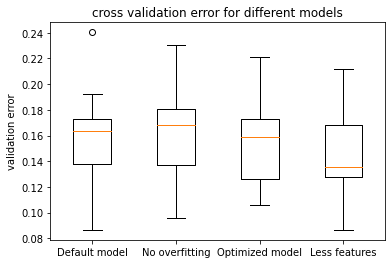

Average misclassification error for the default model: 0.1578
Average misclassification error for the model without overfitting: 0.1617
Average misclassification error for the optimized model: 0.1540
Average misclassification error for the optimized model with removed features: 0.1472


In [ ]:
models = [default_model, model_without_overfit, optimized_model,
          optimized_model_with_removed_features]

k_fold = 10
misclassification = np.zeros((k_fold, len(models)))

# use cross validation to calculate error on new data of the three models
cv = skl_ms.KFold(n_splits=k_fold, random_state=rand_state, shuffle=True)

for i, (train_index, val_index) in enumerate(cv.split(X)):
  # split train and validation data
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  X_train2, X_val2 = X_2.iloc[train_index], X_2.iloc[val_index] # data without all features
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]

  # train each model and calculate misclassification error on validation data
  for m in range(np.shape(models)[0]):
    model = models[m]
    if m == 3:
      model.fit(X_train2, y_train)
      prediction = model.predict(X_val2)
    else:
      model.fit(X_train, y_train)
      prediction = model.predict(X_val)
    misclassification[i, m] = np.mean(prediction != y_val)

plt.boxplot(misclassification)
plt.title('cross validation error for different models')
plt.xticks(np.arange(len(models))+1, ('Default model', 'No overfitting',
                                      'Optimized model', 'Less features'))
plt.ylabel('validation error')
plt.show()

# print average misclassification error for each model
print('Average misclassification error for the default model: %.4f'
 %np.mean(misclassification[:, 0]))
print('Average misclassification error for the model without overfitting: %.4f'
 %np.mean(misclassification[:, 1]))
print('Average misclassification error for the optimized model: %.4f'
 %np.mean(misclassification[:, 2]))
print('Average misclassification error for the optimized model with removed features: %.4f'
 %np.mean(misclassification[:, 3]))

The model with the highest performance seems to be the one with the optimized hyperparameters which has been trained with a reduced number of features.

In [ ]:
# save best model as a file
joblib.dump(optimized_model_with_removed_features, 'random_forest.pkl')

['random_forest.pkl']